In [ ]:
#PIA.- Entrenamiento de una red neuronal artificial
#Jorge Luis Nava Ortiz 1991839
#Victor David Martínez Hernández  1603745
#Héctor Hugo Rasgado Nolasco 1853058
#Luis Alberto Rivera Borrego 2035585
#Mauricio Guevara Jiménez 1817333

In [ ]:
#TensorFlow y tf.keras
# Librerias de ayuda
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import os
import glob


In [ ]:
Nmo_mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = Nmo_mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro',
               'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

In [ ]:
train_images.shape


(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

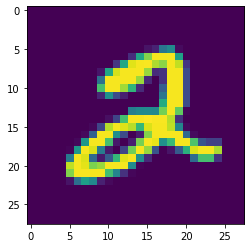

In [ ]:
plt.figure()
plt.imshow(train_images[5])
plt.colormaps()
plt.grid(False)
plt.show()

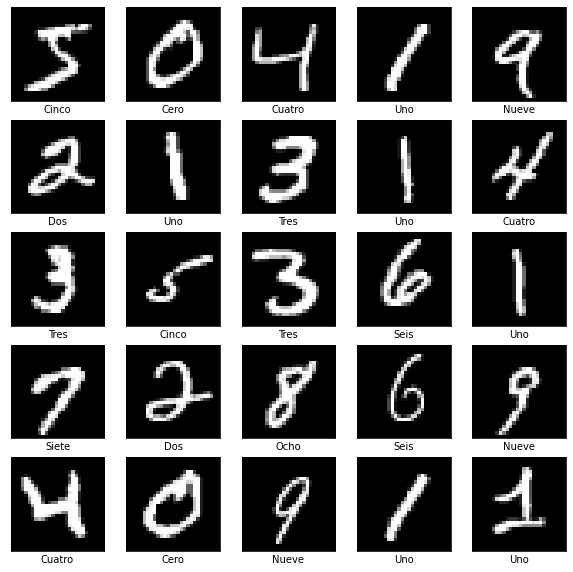

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.gray)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2589 - accuracy: 0.9259 - val_loss: 0.1344 - val_accuracy: 0.9608
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1159 - accuracy: 0.9654 - val_loss: 0.0991 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0817 - accuracy: 0.9755 - val_loss: 0.0851 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0607 - accuracy: 0.9817 - val_loss: 0.0817 - val_accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0490 - accuracy: 0.9855 - val_loss: 0.0801 - val_accuracy: 0.9743
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0375 - accuracy: 0.9886 - val_loss: 0.0812 - val_accuracy: 0.9752
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0737 - val_accuracy:

313/313 - 0s - loss: 0.0813 - accuracy: 0.9791 - 377ms/epoch - 1ms/step


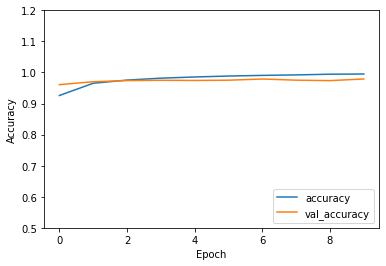

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.2])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0813 - accuracy: 0.9791 - 409ms/epoch - 1ms/step

Test accuracy: 0.9790999889373779


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

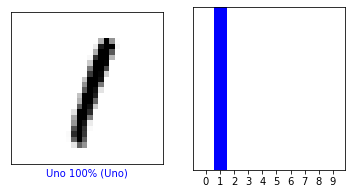

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

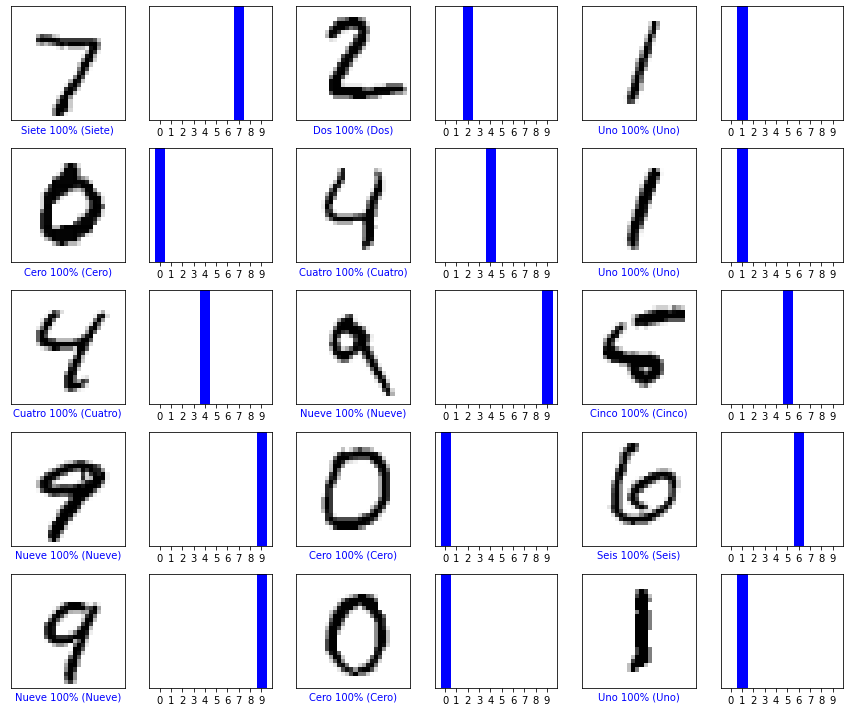

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 1er Predicción

In [ ]:
np.argmax(predictions[5])

1

In [ ]:
test_labels[5]

1

# 2da Predicción

In [ ]:
np.argmax(predictions[700])

1

In [ ]:
test_labels[700]

1

# 3er Predicción

In [ ]:
np.argmax(predictions[77])

2

In [ ]:
test_labels[77]

2